# Feature Extraction from Forum Posts for Hate Speech Detection


In this exercise, we work with a dataset derived from Stormfront, a white supremacist forum. This dataset includes forum posts segmented into sentences, each manually labeled as either containing hate speech ('1') or not ('0') based on specific guidelines. Learn more about the dataset [here](https://github.com/Vicomtech/hate-speech-dataset).

For textual data, we need to perform feature extraction in order to train a supervised machine learning model. In this lab, our  goal is to explore the different **feature extraction methods**, and not to optimise the performance of the model.

In [1]:
#Loading Libraries

from textblob import TextBlob
import nltk
#nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


#text analysis
import re 
import nltk 
import string

#data processing
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt 
import seaborn as sns



%matplotlib inline

In [2]:
pd.set_option("display.max_colwidth", 300)
#This helps us see the dataframes in a more visually pleasing manne

In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train.head()

,file_id,user_id,subforum_id,num_contexts,label,comment
0,12834217_2,572066,1346,0,0,"In order to help increase the booklets downloads , it would be great if all Stormfronters who had YouTube accounts , could display the following text in the description boxes of their uploaded YouTube videos ."
1,12834217_4,572066,1346,0,1,Click below for a FREE download of a colorfully illustrated 132 page e-book on the Zionist-engineered INTENTIONAL destruction of Western civilization .
2,12834493_1,572058,1396,0,1,"She may or may not be a Jew but she 's certainly stupid , she seems to think the Blacks wo n't kill her alongside every other White they can get their dirty hands on , what a muppet !"
3,12849464_2,575975,1346,0,0,I think you should write a book as well .
4,12849464_5,575975,1346,1,0,"I guess I 'll just stick to homeschooling my kids , when and if I have them ..."


In [4]:
#Typical comments considered not hate speech
train[train['label'] == 0].head()

,file_id,user_id,subforum_id,num_contexts,label,comment
0,12834217_2,572066,1346,0,0,"In order to help increase the booklets downloads , it would be great if all Stormfronters who had YouTube accounts , could display the following text in the description boxes of their uploaded YouTube videos ."
3,12849464_2,575975,1346,0,0,I think you should write a book as well .
4,12849464_5,575975,1346,1,0,"I guess I 'll just stick to homeschooling my kids , when and if I have them ..."
8,12870229_3,572066,1346,0,0,com/watch ? v = kBD6Gm6VoDM Then watch 8 min. Obama at AIPAC @ youtube .
10,12883101_2,577823,1345,4,0,Welcome to the front lines ...


In [5]:
#Typical comments considered hate speech
train[train['label'] == 1].head()

,file_id,user_id,subforum_id,num_contexts,label,comment
1,12834217_4,572066,1346,0,1,Click below for a FREE download of a colorfully illustrated 132 page e-book on the Zionist-engineered INTENTIONAL destruction of Western civilization .
2,12834493_1,572058,1396,0,1,"She may or may not be a Jew but she 's certainly stupid , she seems to think the Blacks wo n't kill her alongside every other White they can get their dirty hands on , what a muppet !"
5,12855154_1,576372,1346,0,1,Their gods often had pale skin and blue eyes but I suppose literacy is n't valued highly by their cultural intelligencia .
6,12860820_1,573375,1346,0,1,Greece need a man like Adolf Hitler and now is the perfect time to start a national political movement to free Your country from the zionist bankers
7,12869018_3,575841,1346,1,1,He is a pathetic little chimp .


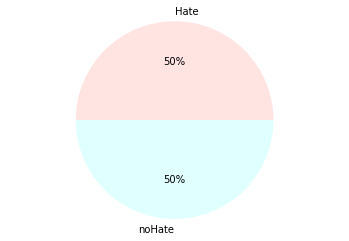

In [6]:
#Visualising
%matplotlib inline

labels=['Hate', 'noHate']
colors = ['mistyrose','lightcyan']
sizes=[train['label'].value_counts()[1],
     train['label'].value_counts()[0]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors,autopct='%1.0f%%')
ax1.axis('equal')
plt.show()

# Preprocessing and Cleaning the Data
For cleaning the data, we will do the following:

1. Combine both test and training set so we can preprocess both together
2. Clean the comments
3. Tokenise the cleaned comments
4. Normalize comments

In [7]:
#combine test and train set
combine= train.append(test,ignore_index=True, sort=True)

In [8]:
def clean_comment(text):
    """
    Function to clean the text in the 'comment' column.
    """
    # Convert text to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove user tags
    text = re.sub(r'@\w+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove extra whitespaces
    text = text.strip()
    
    #Remove special characters
    text = re.sub("[^a-zA-Z#]", " ", text)
    
    #remove short words
    text = ' '.join(word for word in text.split() if len(word) >= 3)
    
    return text

In [9]:
#create a new column "tidy_comment" which has our processed, tidy text


In [10]:
#combine.head()

**Tokenize the Comments**

In [11]:
#Write Code Here

**Normalize the Comment**

Examples: Stemming or Lemmatization, Handling Stopwords, Handling Negations, Synonym Consolidation, Expand Contractions, Spell Correction, Handling of Emojis and Emoticonsetc.

In [12]:
#Write Code Here

**Data Analysis and Visualization**

Wordcloud: Most used words (have bigger fonts), for no hate and hate comments. [Reference](https://amueller.github.io/word_cloud/).

In [13]:
#wordcloud generation for all comments
#wordcloud for no hate comments
#wordcloud for hate comments

#Write Code Here

# Feature Extraction

**Extracting Features from Text**

1. **Bag Of Words Features:** creates a matrix of the unique tokens (in all documents in a corpus) and their respective frequencies. This will not see the context of the words, merely the presence of the word. [Reference](https://machinelearningmastery.com/gentle-introduction-bag-words-model/)

2. **TF-IDF Features:** like BOW, but gives more weight to rare words. That is, words that occur frequently in only a few tweets are given more importance than words that occur in all tweets. [Reference](https://medium.com/acing-ai/what-is-tf-idf-in-feature-engineering-7f1ba81982bd)

3. **Word Embeddings (Word2Vec):** these are representations of texts that preserve the semantics (in a way). Here, words with similar meaning will be mapped to a similar representation. Word2Vec gives a numerical representation of a word,that preserve the relationship between words (such as synonyms or antonyms). [Reference](https://towardsdatascience.com/introduction-to-word-embedding-and-word2vec-652d0c2060fa)

**Bag of word features**

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
#Write Code Here

**TF-IDF Features**

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Write Code Here

**Word2Vec Embeddings**

In [16]:
#Write Code Here

# Building the Model

Each of the three feature extraction methods would provide a different feature set.

Build a Logistic Regression model to test the performance using the three different feature sets.


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [18]:
#Report the Results
#Write Code Here